# 5.3 Creating Plots with matplotlib and pandas
The `matplotlib` and `pandas` libraries work well together for producing ad-hoc visualizations. Similarly to how we used Python lists to create plots in the previous reading, we can also use dataframe columns (Series objects) as the input data to draw lines. This makes it extremely easy to create visualizations and explore the data as we are manipulating it.

### About the data

The data used in this notebook shows information about passengers on the *Titanic* cruiseliner, a ship which set out from Southampton, U.K. to sail across the Atlantic ocean and which tragically sank upon collision with an iceberg. The dataset contains information about each passenger's passenger class, name, sex, age, siblings, parents/children, ticket number, ticket fare, cabin number, and the embarked location. It also contains information about each passenger's survival status. This data set is extremely popular among data scientists and will facilitate demonstrations of matplotlib and Pandas concepts.

### Import the libraries
In order to use both pandas and matplotlib, we will need to import both libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Import the data
To use data from a pandas dataframe to make matplotlib graphs, we can import the data from a CSV file in the same way that we imported data in previous modules.

In [2]:
df = pd.read_csv('./data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Creating a graph with a dataframe
Great! It looks like we are ready to start graphing the Titanic data.

Recall that previously, we used data stored in regular Python lists to make graphs.

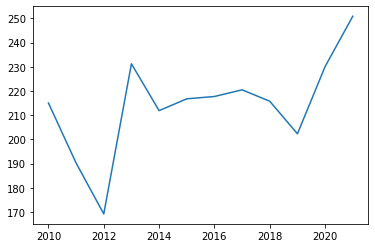

In [3]:
iphone_sales = [215.05, 190.26, 169.22, 231.22, 211.88, 216.76, 217.72, 220.48, 215.76, 202.31, 230.1, 250.87]
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

plt.plot(year, iphone_sales)
plt.show()

In the example above, the data stored in the lists was used to plot the points of the line chart.

Dataframes, however, don't have Python lists. Instead, they have `Series` objects that represent an entire column of the data set. These `Series` objects can also be used to create graphs in the same way that a regular list can.

That means that we can simply insert two entire columns into the `plot()` function to create a line chart.

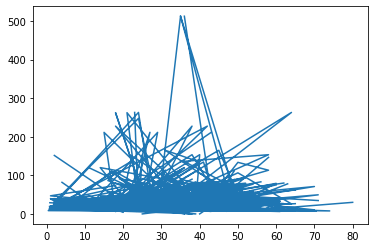

In [4]:
plt.plot(df['Age'], df['Fare'])
plt.show()

Uh oh. That doesn't look good at all. This graph seems to have the correct axes (`Age` on the x-axis and `Fare` on the y-axis), but the lines are going all over the place. What went wrong here?

The issue is that the data isn't sorted. The `matplotlib` library started reading the data set from top to bottom, drawing lines between each point as it found them. Thus, the final graph has lines going forwards, backwards, and all over the place.

To fix this, we can sort the dataset using one of the columns that is being plotted. The one that makes the most sense to me in this case is to sort the data by `Age` in ascending order.

In [5]:
df.sort_values(by="Age", inplace=True)

Then, we can try plotting again.

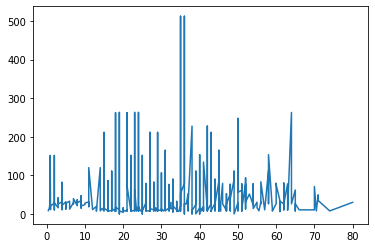

In [6]:
plt.plot(df['Age'], df['Fare'])
plt.show()

This new graph looks better, but is still isn't very useful. What happened?

All of the data became sorted in the new dataframe, and a line was correctly drawn from each sequential `Age` and its `Fare` to the next. However, because there may be several passengers with the same `Age` who paid a different `Fare`, lines were also drawn vertically, creating a graph that looks like just a bunch of lines.

To make this graph even better, we can use `.groupby()` and `.agg()` to make a new **aggregated** dataframe that only has each `Age` once. Let's create a new dataframe by grouping by `Age` and finding the average `Fare` for each one.

In [7]:
age_df = df.groupby('Age').agg({'Fare': 'mean'})
age_df

,Fare
Age,
0.42,8.5167
0.67,14.5000
0.75,19.2583
0.83,23.8750
0.92,151.5500
...,...
70.00,40.7500
70.50,7.7500
71.00,42.0792


In the new dataframe above `age_df` we can see that the `Age` column has now become the index of the dataframe, and the only column remaining in the dataframe is `Fare`, which contains the average fare for each age. To prevent the `Age` column from becoming the index of this new dataframe, we can pass in the parameter `as_index=False` to the `.groupby()` method.

In [8]:
age_df = df.groupby('Age', as_index=False).agg({'Fare': 'mean'})
age_df

,Age,Fare
0,0.42,8.5167
1,0.67,14.5000
2,0.75,19.2583
3,0.83,23.8750
4,0.92,151.5500
...,...,...
83,70.00,40.7500
84,70.50,7.7500
85,71.00,42.0792
86,74.00,7.7750


Now we have a new dataframe with two columns `Age` and `Fare`. This is similar to the dataframe we had previously, except that this time, each `Age` is only listed once. Let's plot it!

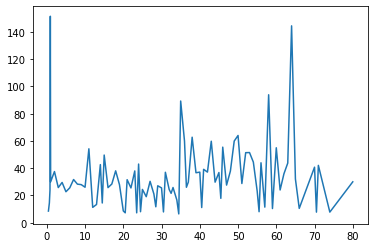

In [9]:
plt.plot(age_df['Age'], age_df['Fare'])
plt.show()

This graph looks **much** better. Now, we can clearly see that passengers of the Titanic above the age of about 35 tended to pay higher fares than passengers under 35 years of age.

Finally, let's make the graph bigger and add a title and axis labels.

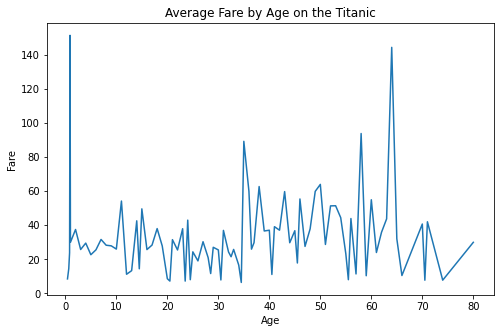

In [10]:
plt.figure(figsize=(8, 5))

plt.plot(age_df['Age'], age_df['Fare'])

plt.title('Average Fare by Age on the Titanic')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

#### The importance of aggregation
As you can see in the previous example, aggregation is an important part of data visualization. Sometimes, data sets will have one unique y-axis value for each x-axis value by nature, such as temperature on a given day. Other times, however, data will need to be aggregated before it can be used. The process above was meant to give you an idea of what you can do if you come across data that is not aggregated and not sorted, since you will often need to pre-process your data before visualizing it.

#### Taking it one step further

The plot above is great, but could be improved. For example, let's say that I want to show the average `Fare` for each `Age` not just in one line, but three lines (one for each `Pclass`). That way, I can learn a bit about how each passenger's `Pclass` affects the price.

To start, I can go back to my original dataframe and group by both `Age` and `Pclass`, finding the average `Fare` for each.

In [11]:
age_pclass_df = df.groupby(['Age', 'Pclass'], as_index=False).agg({'Fare': 'mean'})
age_pclass_df

,Age,Pclass,Fare
0,0.42,3,8.5167
1,0.67,2,14.5000
2,0.75,3,19.2583
3,0.83,2,23.8750
4,0.92,1,151.5500
...,...,...,...
177,70.00,2,10.5000
178,70.50,3,7.7500
179,71.00,1,42.0792
180,74.00,3,7.7750


Next, I can use filters to create three separate dataframe, one for each `Pclass`.

In [12]:
age_pclass_df_1 = age_pclass_df[age_pclass_df['Pclass'] == 1]
age_pclass_df_2 = age_pclass_df[age_pclass_df['Pclass'] == 2]
age_pclass_df_3 = age_pclass_df[age_pclass_df['Pclass'] == 3]

Finally, I can use the `plot()` function three separate times to plot three different lines on the same graph.

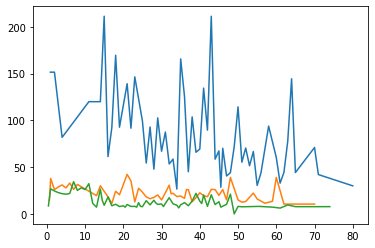

In [13]:
plt.plot(age_pclass_df_1['Age'], age_pclass_df_1['Fare'])
plt.plot(age_pclass_df_2['Age'], age_pclass_df_2['Fare'])
plt.plot(age_pclass_df_3['Age'], age_pclass_df_3['Fare'])

plt.show()

This graph is really cool! It needs some labels, a legend, and some sizing, but other than that looks good. The only issue with this graph is that there are so many ups and downs that it's hard to determine what the average `Fare` for each `Age` actually is. Unfortunately, however, there's not enough data to get a good estimate for each individual `Age` in each individual `Pclass`, so there is only one passenger at age 80, for example, in `Pclass` 1 and no passengers of that age in other classes.

Let's fix this by separating each passenger into a new column called `AgeGroup`. Passengers under 10 years old will go to group 0, passengers under 20 years old but older than 10 will go to group 10, and so on. That way, we can aggregate the average `Fare` for each `AgeGroup`.

Each group will have a range of 10 years, ie 0-9, 10-19, 20-29, etc.

In [14]:
df['AgeGroup'] = df['Age'] // 10 * 10 # converts ages to 10's
df.iloc[[6, 66, 666]] # select some random rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,0.0
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.90,NaN,S,10.0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.00,1,0,244252,26.00,NaN,S,50.0


Now, we can aggregate and plot in the same way as before, but with the `AgeGroup` column instead of the `Age` column.

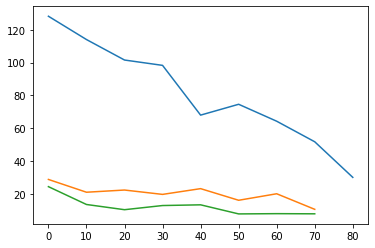

In [15]:
age_pclass_df = df.groupby(['AgeGroup', 'Pclass'], as_index=False).agg({'Fare': 'mean'})

age_pclass_df_1 = age_pclass_df[age_pclass_df['Pclass'] == 1]
age_pclass_df_2 = age_pclass_df[age_pclass_df['Pclass'] == 2]
age_pclass_df_3 = age_pclass_df[age_pclass_df['Pclass'] == 3]

plt.plot(age_pclass_df_1['AgeGroup'], age_pclass_df_1['Fare'])
plt.plot(age_pclass_df_2['AgeGroup'], age_pclass_df_2['Fare'])
plt.plot(age_pclass_df_3['AgeGroup'], age_pclass_df_3['Fare'])

plt.show()

The large spikes in the line graph have been eliminated, and trends comparing `AgeGroup` and `Fare` are clearly visible. With some formatting, we can make the plot presentable.

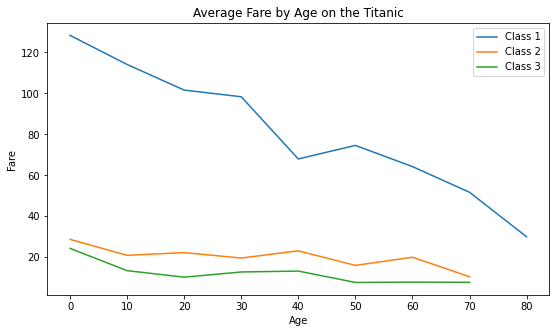

In [16]:
plt.figure(figsize=(9, 5))

plt.plot(age_pclass_df_1['AgeGroup'], age_pclass_df_1['Fare'], label='Class 1')
plt.plot(age_pclass_df_2['AgeGroup'], age_pclass_df_2['Fare'], label='Class 2')
plt.plot(age_pclass_df_3['AgeGroup'], age_pclass_df_3['Fare'], label='Class 3')

plt.title('Average Fare by Age on the Titanic')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

plt.show()

### Common plot types
The `plot()` function is just one of the many types of graphs that you can make with `matplotlib`. Below are explanations for other types of charts that you can make that are commonly used in data analysis. Each chart has it's own quirks and differences from the rest of the charts which are inherent to data visualization itself.

#### Line graph
The line graph is used to plot the relationship between two variables. It is most commonly used after first aggregating the y-axis variable across the x-axis variable, as seen above. Thus, *two numerical columns* are used to create a line graph. Line graphs are also commonly made with *one date and one numerical column*.

You can use the `plot()` function to create a line chart.

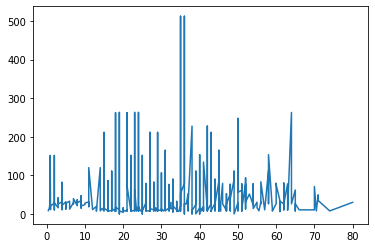

In [17]:
plt.plot(df['Age'], df['Fare'])
plt.show()

##### Optional parameters

| Parameter   | Required | Description                                                                                                                                                                                                                | Example                                           |
|-------------|----------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------|
| `x`         | Yes      | An array of numbers (list or Series). This is the actual data. Note that this parameter does not need to be specified to be used but should be the first argument used. If specified, `y` must also be specified.          | `plt.plot(x=df['Age'], y=df['Fare'])`             |
| `y`         | Yes      | An array of numbers (list or Series). This is the actual data. Note that this parameter does not need to be specified unless `x` is specified and should be the second argument used.                                      | `plt.plot(x=df['Age'], y=df['Fare'])`             |
| `color`     | No       | A string indicating either a pre-defined color name (ie. `"red"`) or a hex color (ie. `"#eef944"`). This will be the color of the line.                                                                                    | `plt.plot(df['Age'], df['Fare'], color='yellow')` |
| `linestyle` | No       | A formatted string that determines how the line will be drawn. The values that this parameter can take include `"-"` (solid line), `":"` (dotted line), `"--"` (dashed line), `"-."` (dashdot), and `" "` (no line).       | `plt.plot(df['Age'], df['Fare'], linestyle='-.')` |
| `marker`    | No       | A specific string that determines how each point of the line will be drawn. The parameter can be set to take one of several different string values, including `"o"` (circle), `"*"` (star), `"."` (point), and `"x"` (X). | `plt.plot(df['Age'], df['Fare'], marker='X')`     |
| `linewidth` | No       | A number indicating how wide to draw the line.                                                                                                                                                                             | `plt.plot(df['Age'], df['Fare'], linewidth=1.5)`  |

#### Histogram

The histogram is a graph used to find the frequency of values in a *single numerical column*. For this reason, you only need to select one column when creating a histogram.

You can use the `hist()` function to create a histogram.

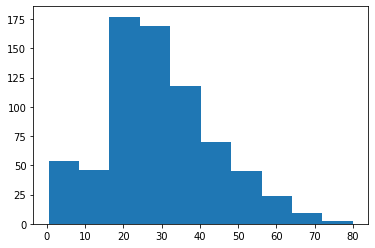

In [18]:
plt.hist(df['Age'])
plt.show()

##### Optional parameters

| Parameter | Required | Description                                                                                                                                                             | Example                                |
|-----------|----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------|
| `x`       | Yes      | An array of numbers (list or Series). This is the actual data. Note that this parameter does not need to be specified to be used, but should be the first argument used. | `plt.hist(x=df['Age'])`                |
| `bins`    | No       | An integer that defines *how many* bins.                                                                                                                                | `plt.hist(df['Age'], bins=10)`         |
| `color`   | No       | A pre-defined color as a string (ie. `"red"`) or a hex color as a string (ie `"#abcf04"`).                                                                              | `plt.hist(df['Age'], color='#abcf04')` |
| `range`   | No       | A list with two numbers, the first representing the start and the second representing the end of a range of numbers with which to create the histogram.                 | `plt.hist(df['Age'], range=[20, 40])`  |

#### Box plot
The box plot is used to show a *single column of numerical* data in a format that shows the median of the data set and its outliers. Like the histogram, only one column needs to be selected to use the box plot.

You can use the `boxplot()` function to create a box plot.

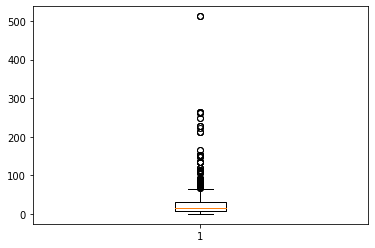

In [19]:
plt.boxplot(df['Fare'])
plt.show()

**Note:** The `boxplot()` function will return an empty chart if there are null values in the data.

##### Optional parameters

| Parameter | Required | Description                                                                                                                                                             | Example                               |
|-----------|----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------|
| `x`       | Yes      | An array of numbers (list or Series). This is the actual data. Note that this parameter does not need to be specified to be used but should be the first argument used. | `plt.boxplot(x=df['Fare'])`           |
| `vert`    | No       | Boolean (True/False) indicating if the box is drawn vertically or not. Default is True, meaning that vertical boxes are drawn by default.                               | `plt.boxplot(df['Fare'], vert=False)` |

#### Scatter plot

The scatter plot is a graph used to plot many points of data. It can be used either with aggregated or non-aggregated data, but is always used with *two numerical columns*.

You can use the `scatter()` function to create a scatter plot.

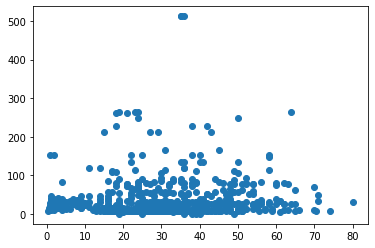

In [20]:
plt.scatter(df['Age'], df['Fare'])
plt.show()

##### Optional parameters

| Parameter | Required | Description                                                                                                                                                                                                                  | Example                                            |
|-----------|----------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------|
| `x`       | Yes      | An array of numbers (list or Series). This is the actual data. Note that this parameter does not need to be specified to be used but should be the first argument used. If specified, `y` must also be specified.            | `plt.scatter(x=df['Age'], y=df['Fare'])`           |
| `y`       | Yes      | An array of numbers (list or Series). This is the actual data. Note that this parameter does not need to be specified to be used unless `x` is specified and should be the second argument used.                             | `plt.scatter(x=df['Age'], y=df['Fare'])`           |
| `s`       | No       | Can be a single number or a numerical column. If a single number, each data point will be given the same size. If given a column, each data point will be sized according to the column's value. Should be positive numbers. | `plt.scatter(df['Age'], df['Fare'], s=df['Fare'])` |
| `c`       | No       | Can be a single string representing a color (ie. "red" or "#eff456").                                                                                                                                                        | `plt.scatter(df['Age'], df['Fare'], c=df['Sex'])`  |
| `alpha`   | No       | A number between 0.0 and 1.0 representing opacity. A value of 1 means that points will be completely opaque. Use this parameter to see the density of points in an area.                                                     | `plt.scatter(df['Age'], df['Fare'], alpha=0.3)`    |

#### Pie chart

The pie chart is a graph used to show percentages across a category. It only takes aggregated data. The data must be a *single column of numerical data*.

You can make a pie chart by using the `pie()` function.

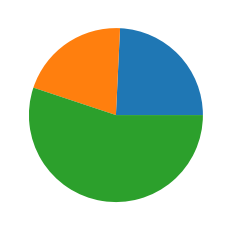

In [21]:
aggregated_df = df.groupby('Pclass', as_index=False).agg({'PassengerId': 'count'})
aggregated_df.rename(columns={'PassengerId': 'Count'}, inplace=True)

plt.pie(aggregated_df['Count'])
plt.show()

##### Optional parameters

| Parameter | Required | Description                                                                                                                                                                                                                                                                 | Example                                                            |
|-----------|----------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------|
| `x`       | Yes      | An array of numbers (list or Series). This is the actual data. Note that this parameter does not need to be specified to be used but should be the first argument used. Each row will receive its own slice of the pie with the width dependent on the value of the number. | `plt.pie(x=aggregated_df['Count'])`                                |
| `labels`  | No       | An array of numbers or strings (list or Series) that corresponds to the values passed in to the `x` variable. The labels will appear outside of each slice of the pie as category names.                                                                                    | `plt.pie(x=aggregated_df['Count'], labels=aggregated_df['Count'])` |
| `autopct` | No       | A formatted string that determines how to display percentages, which are not shown by default. Pass in the string `"%1.1f%%"` to get a percentage with a single decimal place.                                                                                              | `plt.pie(x=aggregated_df['Count'], autopct='%1.1f%%')`             |
| `radius`  | No       | A number that determines the size of the pie chart. Default is 1.                                                                                                                                                                                                           | `plt.pie(x=aggregated_df['Count'], radius=1.5)`                    |

For a more comprehensive list of plots that you can make with `matplotlib`, check out the documentation for plot types at [this link](https://matplotlib.org/stable/plot_types/index.html).